In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

<class 'ModuleNotFoundError'>: No module named 'seaborn'

In [4]:
%pip install seaborn

In [5]:
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [6]:
df = pd.read_csv("websitedata.csv")
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [7]:
df.columns = df.iloc[0]
df.head() 

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [9]:
df = df.drop(index = 0).reset_index(drop = True)
df.columns = ["Channel Group","Date Hour","Users","Sessions","Engaged Sessions","Average engagement time per session","Engaged sessions per user","Events per session","Engagement rate","Event count"]
df.head()

,Channel Group,Date Hour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
1,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
2,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
3,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001
4,Organic Social,2024041721,160,206,103,59.31553398058250,0.64375,4.694174757281550,0.5,967


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3181 entries, 0 to 3180
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Channel Group                        3181 non-null   object
 1   Date Hour                            3181 non-null   object
 2   Users                                3181 non-null   object
 3   Sessions                             3181 non-null   object
 4   Engaged Sessions                     3181 non-null   object
 5   Average engagement time per session  3181 non-null   object
 6   Engaged sessions per user            3181 non-null   object
 7   Events per session                   3181 non-null   object
 8   Engagement rate                      3181 non-null   object
 9   Event count                          3181 non-null   object
dtypes: object(10)
memory usage: 124.3+ KB


In [11]:
import datetime

In [13]:
df["Date Hour"] = pd.to_datetime(df["Date Hour"], format = "%Y%m%d%H", errors = "coerce")
df.head()

,Channel Group,Date Hour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Organic Social,2024-04-17 19:00:00,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
1,Direct,2024-04-17 23:00:00,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
2,Organic Social,2024-04-17 18:00:00,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
3,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001
4,Organic Social,2024-04-17 21:00:00,160,206,103,59.31553398058250,0.64375,4.694174757281550,0.5,967


In [17]:
numeric_cols = df.columns.drop(["Channel Group","Date Hour"])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors = "coerce")
df["Hour"] = df["Date Hour"].dt.hour
df.head()

,Channel Group,Date Hour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
1,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
2,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
3,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20
4,Organic Social,2024-04-17 21:00:00,160,206,103,59.315534,0.643750,4.694175,0.500000,967,21


In [18]:
df.describe()

,Date Hour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
count,3181,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000
mean,2024-04-20 01:18:31.348632576,41.874568,51.114429,28.289217,66.650591,0.606449,4.675970,0.503404,241.907891,11.803521
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:00:00,20.000000,24.000000,13.000000,32.097378,0.561404,3.750000,0.442857,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.040404,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.500000,0.750000,5.218182,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,208.000000,267.000000,132.000000,4525.000000,2.000000,56.000000,1.000000,1147.000000,23.000000
std,NaN,29.383942,36.661139,20.551668,127.220206,0.264064,2.795667,0.228241,183.318978,6.884907


# QUES-1 WHAT ARE THE TRENDS OR PATTERNS CAN WE OBSERVE IN WEBSITE SESSIONS AND USER OVER THE TIME ?

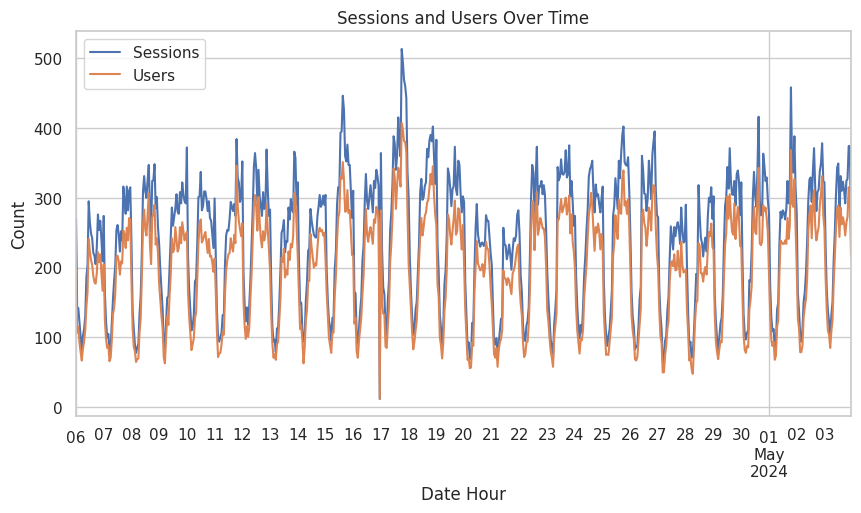

In [21]:
# SESSIONS AND USER OVER TIME 
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))

# Ensure 'df' is defined and 'Date Hour' exists
df.groupby("Date Hour")[["Sessions", "Users"]].sum().plot(ax=plt.gca())
plt.title("Sessions and Users Over Time")
plt.xlabel("Date Hour")
plt.ylabel("Count")
plt.show()

# QUES-2 WHICH MARKETING CHANNEL HAS BROUGHT THE HIGHEST NUMBER OF USERS TO THE WEBSITE AND HOW CAN WE USE THIS INSIGHT TO IMPROVE THE TRAFFIC FROM OTHER SOURCES

<ipython-input-23-5b17f7c2d059>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = "Channel Group", y = "Users", estimator = np.sum , palette = "viridis")


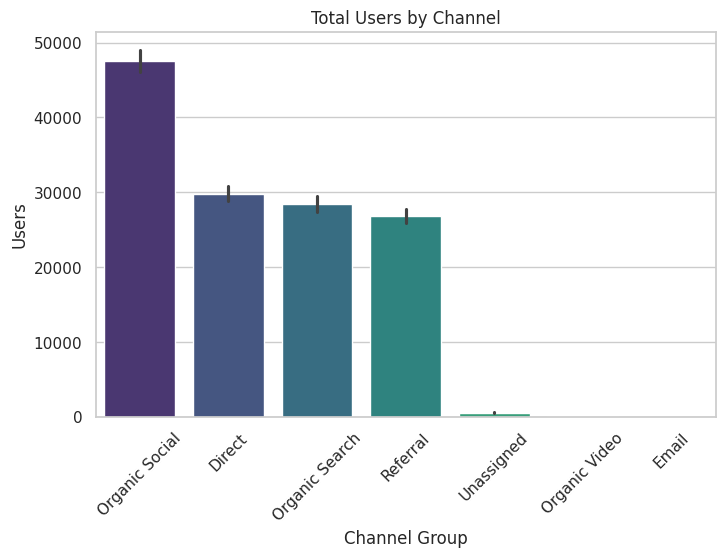

In [23]:
# TOTAL USER BY CHANNEL 
plt.figure(figsize = (8,5))
sns.barplot(data = df, x = "Channel Group", y = "Users", estimator = np.sum , palette = "viridis")
plt.title("Total Users by Channel")
plt.xticks(rotation = 45)
plt.show()

# QUES-3 WHICH CHANNEL HAS THE HIGHEST AVERAGE ENGAGEMENT TIME AND WHAT DOES THAT TELL US ABOUT USER BEHAVIOUR AND CONTENT EFFECTIVENESS ?

<ipython-input-24-281a35e078c9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = "Channel Group", y = "Average engagement time per session", estimator = np.mean , palette = "magma")


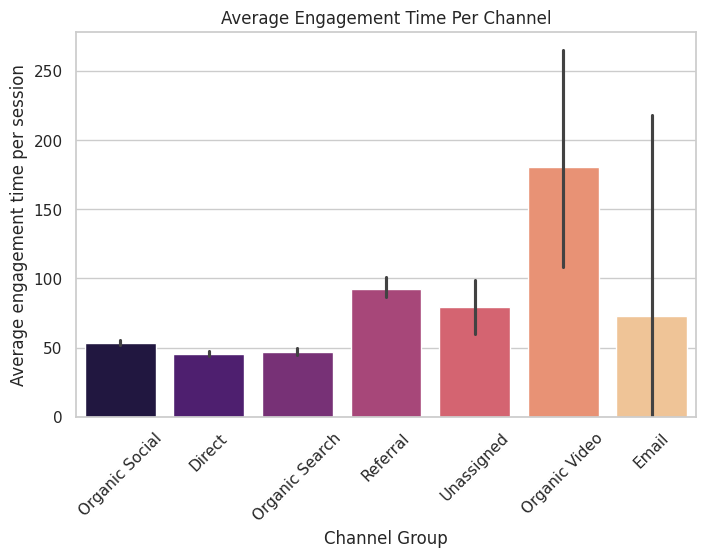

In [24]:
# AVERAGE ENGAGEMENT TIME PER CHANNEL 
plt.figure(figsize = (8,5))
sns.barplot(data = df, x = "Channel Group", y = "Average engagement time per session", estimator = np.mean , palette = "magma")
plt.title("Average Engagement Time Per Channel")
plt.xticks(rotation = 45)
plt.show()

# QUES-4 HOW DOES THE ENGAGEMENT RATE VARY ACROSS DIFFERENT TRAFFIC CHANNEL 

<ipython-input-25-a31e323f0475>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = "Channel Group", y = "Engagement rate", palette = "coolwarm")


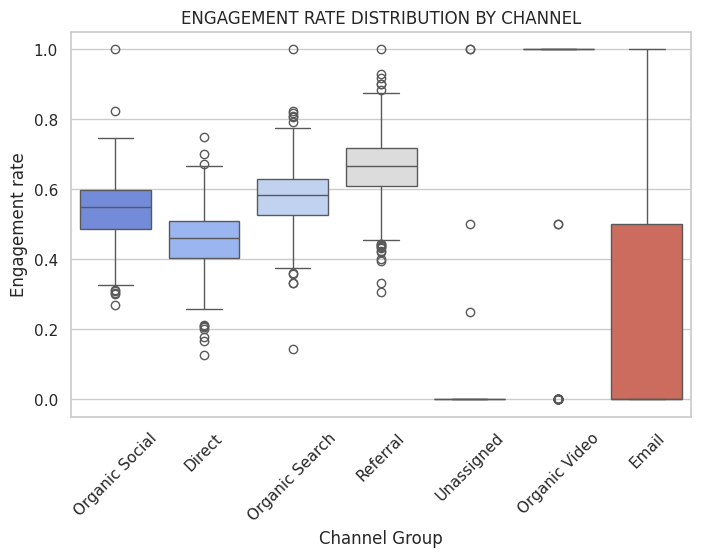

In [25]:
# ENGAGEMENT RATE DISTRIBUTION BY CHANNEL
plt.figure(figsize = (8,5))
sns.boxplot(data = df, x = "Channel Group", y = "Engagement rate", palette = "coolwarm")
plt.title("ENGAGEMENT RATE DISTRIBUTION BY CHANNEL")
plt.xticks(rotation = 45)
plt.show()

# QUES-5 WHICH CHANNELS ARE DRIVEN MORE ENGAGED SESSIONS COMPARED TO NON-ENGAGED ONES AND WHAT STRATEGIES CAN IMPROVE ENGAGEMENT IN UNDERPERFORMING CHANNELS ?

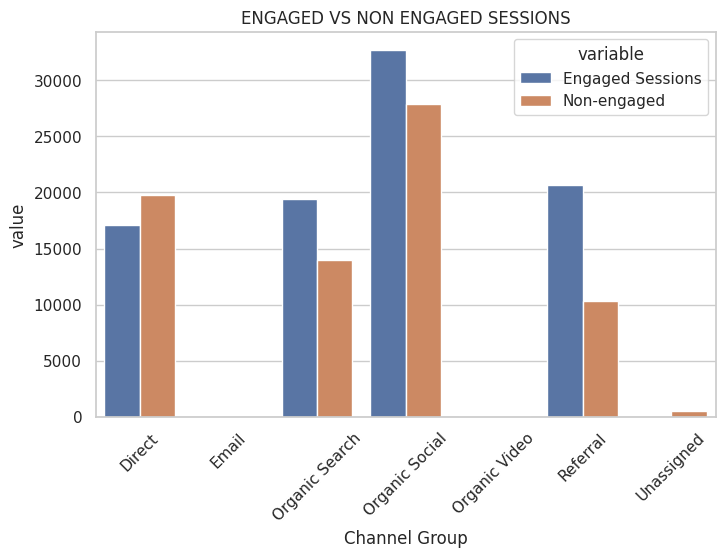

In [27]:
# ENGAGED VS NON ENGAGED SESSIONS 
session_df = df.groupby("Channel Group")[["Sessions","Engaged Sessions"]].sum().reset_index()
session_df["Non-engaged"] = session_df["Sessions"]-session_df["Engaged Sessions"]
session_df_melted = session_df.melt(id_vars = "Channel Group", value_vars = ["Engaged Sessions","Non-engaged"])
plt.figure(figsize = (8,5))
sns.barplot(data =session_df_melted, x = "Channel Group", y = "value", hue = "variable" )
plt.title("ENGAGED VS NON ENGAGED SESSIONS")
plt.xticks(rotation = 45)
plt.show()

# QUES-6 AT WHAT HOURS OF THE DAY DOES THE EACH CHANNEL DRAWS THE MOST TRAFFIC ? 

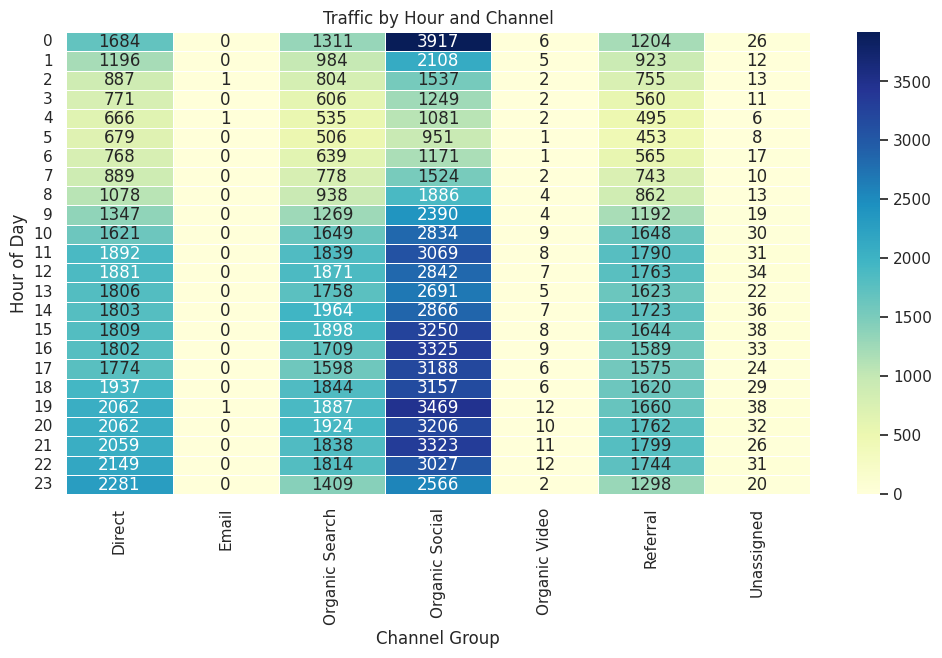

In [28]:
# TRAFFIC BY HOUR AND CHANNEL
heatmap_data =  df.groupby(["Hour","Channel Group"])["Sessions"].sum().unstack().fillna(0)
plt.figure(figsize = (12,6))
sns.heatmap(heatmap_data,cmap="YlGnBu",linewidths = .5, annot = True, fmt = '.0f')
plt.title("Traffic by Hour and Channel")
plt.xlabel("Channel Group")
plt.ylabel("Hour of Day")
plt.show()